# Imports

In [71]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
from array import *
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler



# Round 2

In [72]:
df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

## 1. Show the dataframe shape

In [73]:
df.shape

(10910, 26)

## 2. Standardize header names.

In [74]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [75]:
df.columns= df.columns.str.lower().str.replace(' ', '_')

## 3. Which columns are numerical?

In [76]:
# df._get_numeric_data()
df.select_dtypes('number')

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


## 4. Which columns are categorical?

In [77]:
df.select_dtypes('object')

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


## 5. Check and deal with `NaN` values.

In [78]:
df.isna().sum()

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [79]:
stats.mode(df['state'])

'California'

In [80]:
df['state'].fillna(stats.mode(df['state']), inplace=True)
df['response'].fillna(stats.mode(df['response']), inplace=True)
df['vehicle_class'].fillna(stats.mode(df['vehicle_class']), inplace=True)
df['vehicle_size'].fillna(stats.mode(df['vehicle_size']), inplace=True)

Use Mean or Median to fill months_since_last_claim?

In [81]:
np.mean(df['months_since_last_claim'])

15.149070740488469

In [82]:
np.median(df['months_since_last_claim'])

nan

In [83]:
df['months_since_last_claim'].fillna(np.mean(df['months_since_last_claim']), inplace=True)

In [84]:
np.median(df['number_of_open_complaints'])

nan

In [85]:
np.mean(df['number_of_open_complaints'])

0.38425610586747105

In [86]:
# the majority of the values are zero therefore we add the median which is zero
df['number_of_open_complaints'].fillna(np.median(df['number_of_open_complaints']), inplace=True)

In [87]:
# half of them have no values, the others are Type A so we categorized the missing ones as unknown
df['vehicle_type'].fillna('unknown', inplace=True)

In [88]:
df.isna().sum()

customer                           0
state                              0
customer_lifetime_value            0
response                           0
coverage                           0
education                          0
effective_to_date                  0
employmentstatus                   0
gender                             0
income                             0
location_code                      0
marital_status                     0
monthly_premium_auto               0
months_since_last_claim            0
months_since_policy_inception      0
number_of_open_complaints        633
number_of_policies                 0
policy_type                        0
policy                             0
renew_offer_type                   0
sales_channel                      0
total_claim_amount                 0
vehicle_class                      0
vehicle_size                       0
vehicle_type                       0
dtype: int64

## 6 Datetime format

Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. _Hint_: If data from March does not exist, consider only January and February.

In [89]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors='coerce')

In [90]:
# df['month'] = pd.DatetimeIndex(df['effective_to_date']).month
df['month'] = df['effective_to_date'].dt.month

In [91]:
df[df['month'].isin([1,2])]


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,unknown,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,unknown,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,unknown,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


## 7. BONUS: Put all the previously mentioned data transformations into a function.

In [92]:
#fill NA
def fillna(table, col, method):
    if method == 'mean':
        table[col].fillna(np.mean(table[col]), inplace=True)
    elif method== 'med':
        table[col].fillna(np.median(table[col]), inplace=True)
    elif method == 'mod':
        table[col].fillna(stats.mode(table[col]), inplace=True)    
    else:
        print('Method not defined')
        
#change Type to Datetime
def col_to_datetime(table, col):
    table[col] = pd.to_datetime(table[col], errors='coerce')
    
#Clean Table
def clean_table(table):  
    table.drop(['Unnamed: 0'], axis=1, inplace=True)
    table.columns= table.columns.str.lower().str.replace(' ', '_')
    col_to_datetime(table, 'effective_to_date')
    fillna(table, 'state', 'mod')
    fillna(table, 'response', 'mod')
    fillna(table, 'vehicle_class', 'mod')
    fillna(table, 'vehicle_size', 'mod')
    fillna(table, 'months_since_last_claim', 'mean')
    fillna(table, 'number_of_open_complaints', 'mean')
    table['vehicle_type'].fillna('Unknown', inplace=True)


In [93]:
df2 = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
clean_table(df2)
df2.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

# Round 3

## 1. Show DataFrame info.

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10910 non-null  object        
 1   state                          10910 non-null  object        
 2   customer_lifetime_value        10910 non-null  float64       
 3   response                       10910 non-null  object        
 4   coverage                       10910 non-null  object        
 5   education                      10910 non-null  object        
 6   effective_to_date              10910 non-null  datetime64[ns]
 7   employmentstatus               10910 non-null  object        
 8   gender                         10910 non-null  object        
 9   income                         10910 non-null  int64         
 10  location_code                  10910 non-null  object        
 11  marital_status 

## 2. Describe DataFrame.

In [95]:
summary = df.describe().T
summary['iqr'] = summary['75%']-summary['25%'] # adds Interquartile Range
summary['range'] = summary['max'] - summary['min'] # adds range
for col in summary.columns: # rounds all values in summary
    summary[col] = summary[col].apply(lambda x : round(x, 2))
summary

,count,mean,std,min,25%,50%,75%,max,iqr,range
customer_lifetime_value,10910.0,8018.24,6885.08,1898.01,4014.45,5771.15,8992.78,83325.38,4978.33,81427.37
income,10910.0,37536.28,30359.20,0.00,0.00,33813.50,62250.75,99981.00,62250.75,99981.00
monthly_premium_auto,10910.0,93.20,34.44,61.00,68.00,83.00,109.00,298.00,41.00,237.00
months_since_last_claim,10910.0,15.15,9.78,0.00,7.00,15.00,23.00,35.00,16.00,35.00
months_since_policy_inception,10910.0,48.09,27.94,0.00,24.00,48.00,71.00,99.00,47.00,99.00
number_of_open_complaints,10277.0,0.38,0.91,0.00,0.00,0.00,0.00,5.00,0.00,5.00
number_of_policies,10910.0,2.98,2.40,1.00,1.00,2.00,4.00,9.00,3.00,8.00
total_claim_amount,10910.0,434.89,292.18,0.10,271.08,382.56,547.20,2893.24,276.12,2893.14
month,10910.0,1.47,0.50,1.00,1.00,1.00,2.00,2.00,1.00,1.00


## 3. Show a plot of the total number of responses.

In [96]:
df[(df['response']=='Yes')].shape[0]

amount = [df[(df['response']=='Yes')].shape[0],df[(df['response']=='No')].shape[0]] 
amount

[1466, 9444]

<AxesSubplot:xlabel='response', ylabel='count'>

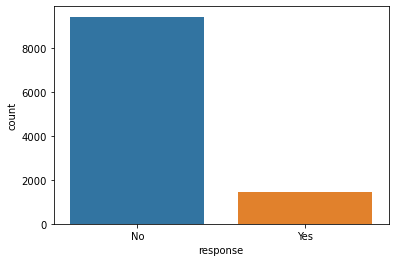

In [97]:
# via countplot
sns.countplot(x='response',data=df)


## 4 Show a plot of the response rate by the sales channel.

In [98]:
### Adding a new column: response_rate

In [99]:
df['response_rate'] = np.where(df.response=='Yes', 1, 0)

<AxesSubplot:xlabel='sales_channel', ylabel='response_rate'>

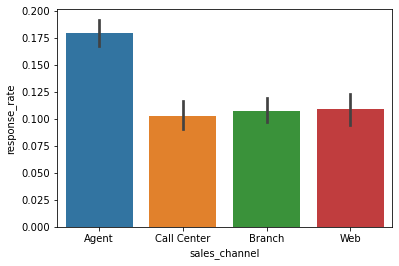

In [100]:
sns.barplot(x='sales_channel',y='response_rate',data=df)


In [101]:
### Storing the response_rate in a list

[Text(0.5, 0, 'Response Rate'), Text(0, 0.5, 'Sales Channel')]

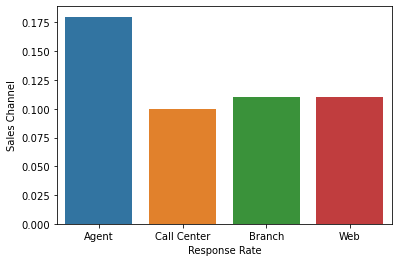

In [102]:
amount = []
for val in df['sales_channel'].unique():
    amount.append(round(df[(df['sales_channel']==val) & (df['response']=='Yes')].shape[0] / df[df['sales_channel']==val].shape[0],2))      
    

data = {'Response': df['sales_channel'].unique().tolist(), 'Amount':amount}
rr = sns.barplot(x='Response', y="Amount", data=data)
rr.set(xlabel="Response Rate", ylabel="Sales Channel") 

In [103]:
# same plot but y-axis goes up to 100%
# rr = sns.barplot(x='Response', y="Amount", data=data)
# rr.set(ylim= (0, 1))  

## 5. Show a plot of the response rate by the total claim amount.

In [105]:
df['total_claim_amount'].describe()

count    10910.000000
mean       434.888330
std        292.180556
min          0.099007
25%        271.082527
50%        382.564630
75%        547.200000
max       2893.239678
Name: total_claim_amount, dtype: float64

In [106]:
step = 200
amount = []
tca_steps = []
for val in range(0, df['total_claim_amount'].astype(int).max()+step, step):
    tca_steps.append(str(val) + '-' + str(val+step))
    if (df[(df['total_claim_amount']>=val) &(df['total_claim_amount']<val+step) &  (df['response']=='Yes')].shape[0]) == 0:
        amount.append(0)
    else:
        amount.append((df[(df['total_claim_amount']>=val) &(df['total_claim_amount']<val+step) &  (df['response']=='Yes')].shape[0])/(df[(df['total_claim_amount']<val+step) & (df['total_claim_amount'] >=val) ].shape[0]))                  
        

[Text(0.5, 0, 'Total Claim Amount'), Text(0, 0.5, 'Response Rate')]

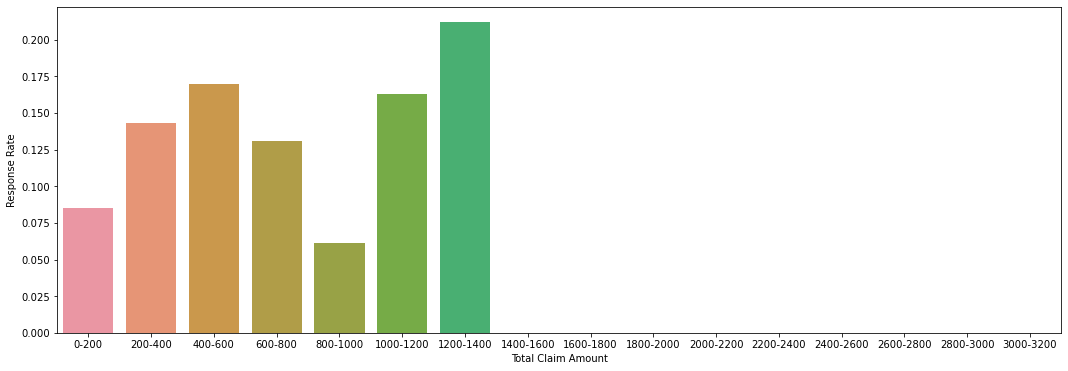

In [107]:
data = {'Response': tca_steps, 'Amount':amount}
plt.figure(figsize=(18,6))
rr = sns.barplot(x='Response', y="Amount", data=data)
rr.set(xlabel="Total Claim Amount", ylabel="Response Rate")


## 6. Show a plot of the response rate by income.

In [108]:
df['income'].describe()

count    10910.000000
mean     37536.284785
std      30359.195670
min          0.000000
25%          0.000000
50%      33813.500000
75%      62250.750000
max      99981.000000
Name: income, dtype: float64

In [109]:
step = 15000
amount = []
tca_steps = []
for value in range(0, df['income'].astype(int).max()+step, step):
    tca_steps.append(str(value) + '-' + str(value+step))
    if (df[(df['income']>=value) &(df['income']<value+step) &  (df['response']=='Yes')].shape[0]) == 0:
        amount.append(0)
    else:
        amount.append(df[(df['income']<value+step) & (df['income'] >=value) ].shape[0] / (df[(df['income']>=value) &(df['income']<value+step) &  (df['response']=='Yes')].shape[0]))

[Text(0.5, 0, 'Income'), Text(0, 0.5, 'Response Rate')]

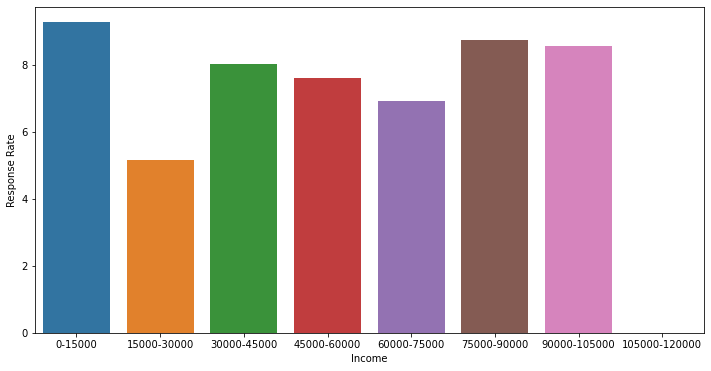

In [110]:
data = {'Response': tca_steps, 'Amount':amount}
plt.figure(figsize=(12,6))
rr = sns.barplot(x='Response', y="Amount", data=data)
rr.set(xlabel="Income", ylabel="Response Rate")

# Round 4

## 1. Check the data types of the columns

Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.

In [111]:
numerical = df._get_numeric_data()
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'month', 'response_rate'],
      dtype='object')

In [112]:
categoricals = df.select_dtypes(object)


Now we will try to check the normality of the numerical variables visually
Use seaborn library to construct distribution plots for the numerical variables

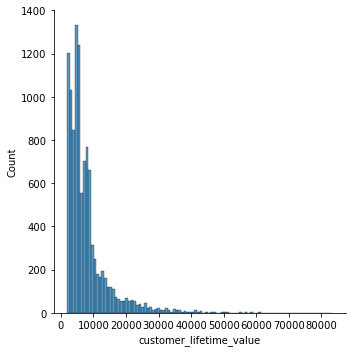

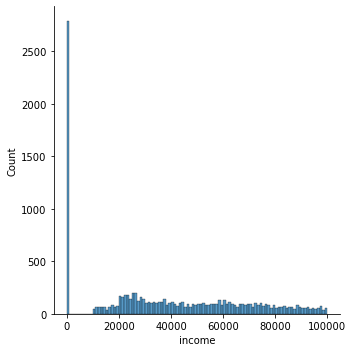

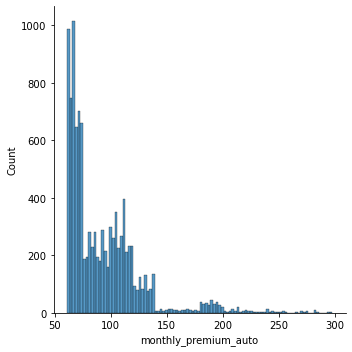

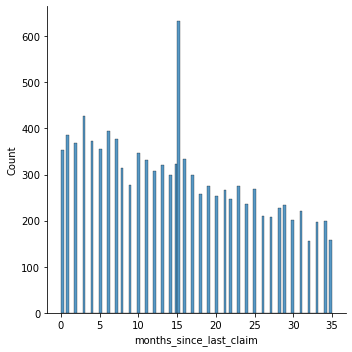

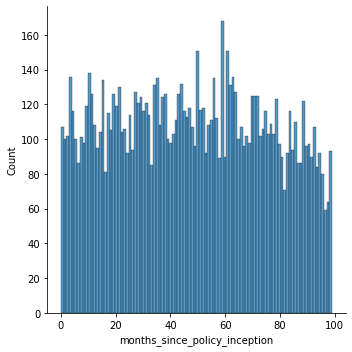

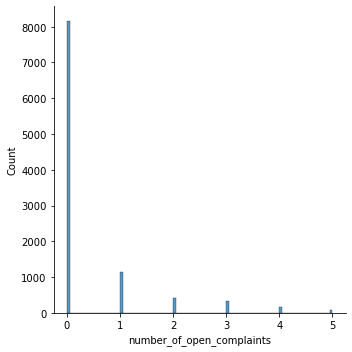

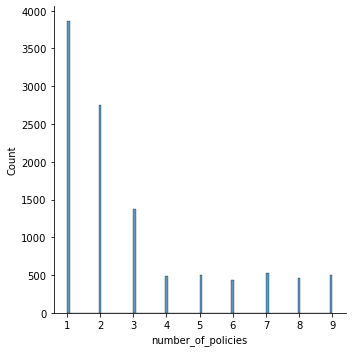

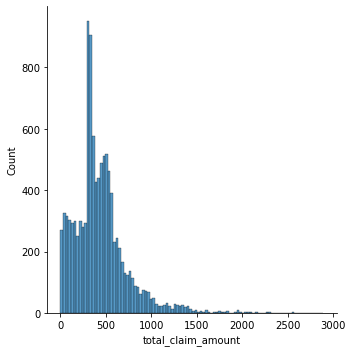

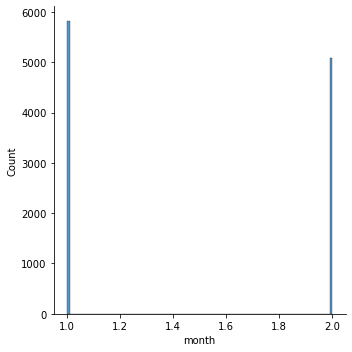

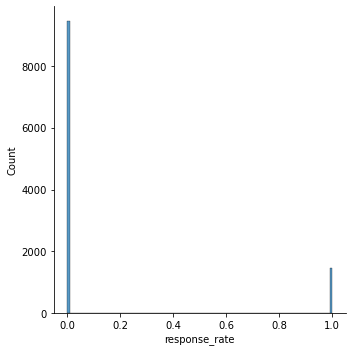

In [113]:
for col in numerical:
    sns.displot(numerical[col], bins=100)
# sns.pairplot(numerical) # takes a long time to load, therefore I deactivated it   

Use Matplotlib to construct histograms

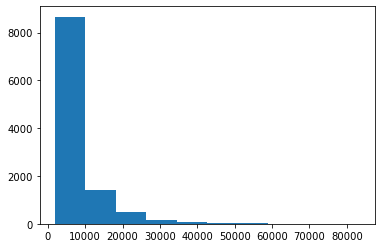

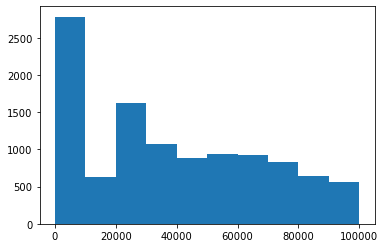

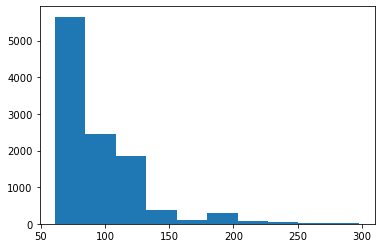

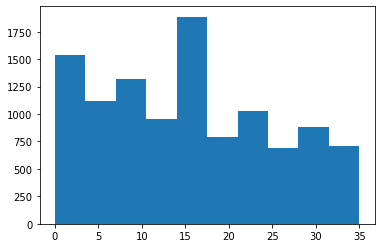

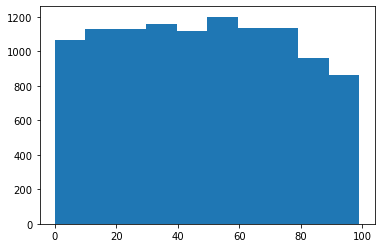

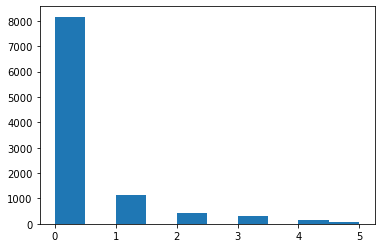

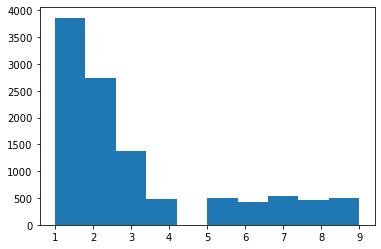

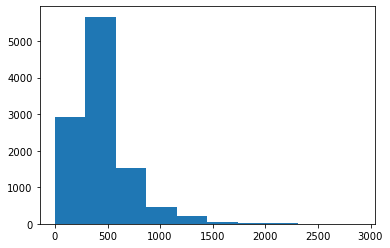

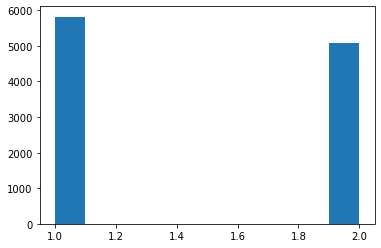

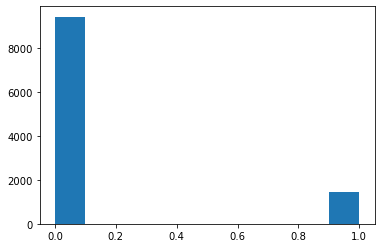

CPU times: total: 859 ms
Wall time: 861 ms


In [114]:
%%time

for col in numerical:
    plt.hist(numerical[col])
    plt.show()

## 2. Check the multicollinearity

For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 

In [115]:
# ???

## 3. Correlation Matrix & Seaborn Heatmap

Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

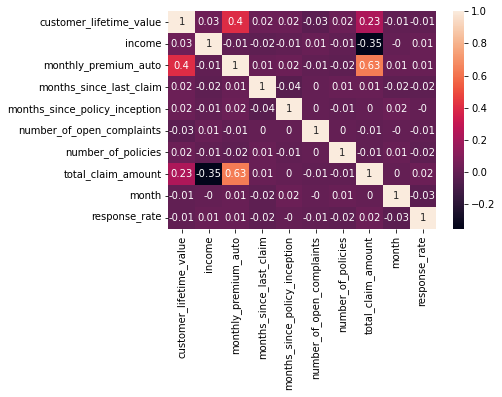

CPU times: total: 391 ms
Wall time: 388 ms


In [116]:
%%time
correlations_matrix = round(numerical.corr(),2)
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# Round 5

In [117]:
X_num = df._get_numeric_data()
X_num = X_num.drop(['month', 'response_rate' ], axis=1)
X_cat = df.select_dtypes(include = object)

## 1. Normalizing the data

In [118]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized #this is an array
X_num = pd.DataFrame(x_normalized, columns=X_num.columns) #now we convert the array to a dataframe


(10910, 8)


## 2a. Removing Outlies of total_claim_amount

C:\Users\TgMiles\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


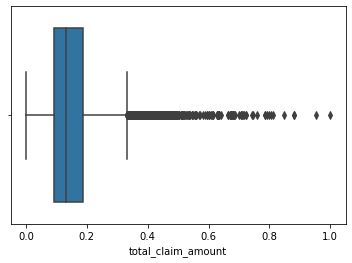

In [119]:
tca = X_num['total_claim_amount']
sns.boxplot(tca)
plt.show()


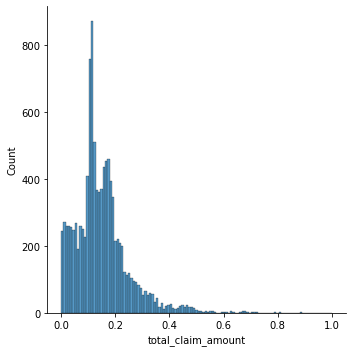

In [120]:
sns.displot(tca)
plt.show()

In [121]:

iqr = np.percentile(tca,75) - np.percentile(tca,25)
upper_limit = np.percentile(tca,75) + 1.5*iqr
lower_limit = np.percentile(tca,25) - 1.5*iqr

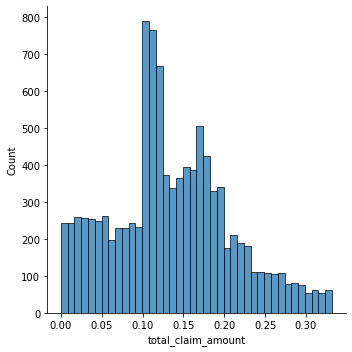

In [122]:
data_x = tca[(tca>lower_limit) & (tca<upper_limit)]
sns.displot(data_x)
plt.show()


## 2b. Removing Outliers of monthly_premium_auto

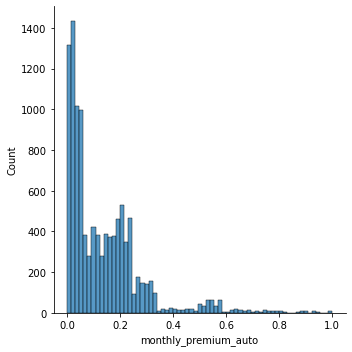

In [123]:
mpa = X_num['monthly_premium_auto']

sns.displot(mpa)
plt.show()

C:\Users\TgMiles\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


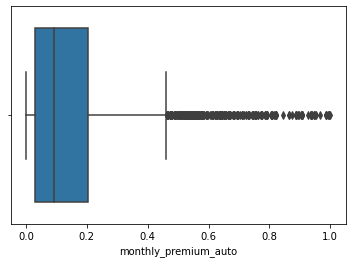

In [124]:
sns.boxplot(mpa)
plt.show()


In [125]:
iqr = np.percentile(mpa,75) - np.percentile(mpa,25)
upper_limit = np.percentile(mpa,75) + 1.5*iqr
lower_limit = np.percentile(mpa,25) - 1.5*iqr

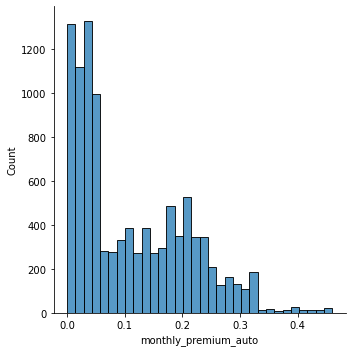

In [126]:
data_y = mpa[(mpa>lower_limit) & (mpa<upper_limit)]
sns.displot(data_y)
plt.show()


## 3. X-y split

In [128]:
y = tca
X = X_num.drop(['total_claim_amount'], axis=1)